# **Linguistic Features:**

Text: The original word text.

Lemma: The base form of the word.

POS: The simple UPOS part-of-speech tag.

Tag: The detailed part-of-speech tag.

Dep: Syntactic dependency, i.e. the relation between tokens.

Shape: The word shape – capitalization, punctuation, digits.

is alpha: Is the token an alpha character?

is stop: Is the token part of a stop list, i.e. the most common words of the language?

In [1]:
# Spacy, nltk, textblob, pandas, numpy, matplotlib, scikit-learn
# Download this in prompt: python -m spacy download en
# There are a few more downloads below

import spacy

nlp_model = spacy.load("en_core_web_sm")

# Create a Doc object
doc = nlp_model(u"Apple is one of the biggest companies in the world")

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX ROOT
one NUM attr
of ADP prep
the DET det
biggest ADJ amod
companies NOUN pobj
in ADP prep
the DET det
world NOUN pobj


In [2]:
doc[0].is_alpha

True

# doc[0].tag
    text; lemma_ ; pos_ ; 
    tag_; shape_; is_alpha;
    is_stop

In [3]:
doc1 = nlp_model(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')
doc1

Although commmonly attributed to John Lennon from his song "Beautiful Boy", the phrase "Life is what happens to us while we are making other plans" was written by cartoonist Allen Saunders and published in Reader's Digest in 1957, when Lennon was 17.

In [4]:
life_quote = doc1[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [5]:
# span is a slice of document or sentence
type(life_quote)

spacy.tokens.span.Span

# Tokenization

In [6]:
mystring = nlp_model(u"One is a number")
print(mystring)

# Create a string that includes opening and closing quotation marks
mystring1 = nlp_model(u"We're here to help! email support@oursite.com or visit us at http://www.oursite.com!")
print(mystring1)

One is a number
We're here to help! email support@oursite.com or visit us at http://www.oursite.com!


In [7]:
# Create a Doc object and explore tokens
doc3 = nlp_model(mystring)

for t in doc3:
    print(t.text)

One
is
a
number


In [8]:
doc4 = nlp_model(mystring1)

for token in doc4:
    print(token)

We
're
here
to
help
!
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


In [9]:
# count of tokens
len(doc4)

14

# Named entity

In [10]:
doc5 = nlp_model(u'Apple is one of the biggest companies in U.S')

for token in doc5:
    print(token.text, end=' | ')

print('\n----')

for ent in doc5.ents:
    print(ent.text+' - '+ent.label_)
    


Apple | is | one | of | the | biggest | companies | in | U.S | 
----
Apple - ORG
U.S - GPE


In [11]:
# Lemmatization/stemming

doc6 = nlp_model(u"Mapping a GIS tool")

for token in doc6:
    print(token.text, '\t', token.pos_, '\t', token.lemma_)

Mapping 	 NOUN 	 mapping
a 	 DET 	 a
GIS 	 PROPN 	 GIS
tool 	 NOUN 	 tool


In [12]:
# Stop words
print(nlp_model.Defaults.stop_words)

{'seem', 'must', 'might', '’m', 'he', 'her', 'noone', 'thence', 'only', 'whereby', 'down', 'between', 'about', 'their', 'wherein', 'therein', 'fifteen', 'almost', 'just', '’s', 'herself', 'none', 'nowhere', 'give', 'regarding', 'former', 'since', 'make', 'part', 'become', 'ca', 'more', 'into', 'take', 'back', 'anywhere', 'i', 'myself', 'there', 'namely', 'hereby', 'go', 'may', 'else', 'twelve', 'least', 'against', 'being', 'on', 'thru', "'s", 'whom', 'be', 'rather', 'everyone', 'below', 'his', "'ve", 'would', 'us', 'should', 'behind', 'anyway', 'we', 'keep', 'therefore', 'it', 'neither', 'while', 'otherwise', 'where', 'throughout', 'amount', 'two', 'afterwards', 'hereupon', 'though', 'of', 'along', 'ourselves', 'serious', 'beforehand', 'call', 'she', 'using', 'often', 'another', 'now', 'because', 'fifty', 'me', '’ll', 'indeed', 'together', 'becoming', 'among', 'except', 'due', 'whence', 'was', 'thereupon', 'few', 'off', 'seemed', 'always', 'mostly', 'very', 'thereby', 'these', 'your', 

# Sentiment analysis


In [13]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

data = pd.read_csv('./test_data.tsv', delimiter = '\t')

# Shape
data

,ID,Review
0,1,The product is missing. It is the worst service.
1,2,It is a good quality product.
2,3,There is a delay of product delivery. Not reco...
3,4,Highly recommend the product!
4,5,Not worth buying it!!
5,6,Nice and cheap!
6,7,@It is very nice.
7,8,I have been using this from 10 days and the pr...
8,9,The product is broken after 1 day. Don't buy it!
9,10,"Amazing product!"""


In [14]:
review = data['Review']
data

,ID,Review
0,1,The product is missing. It is the worst service.
1,2,It is a good quality product.
2,3,There is a delay of product delivery. Not reco...
3,4,Highly recommend the product!
4,5,Not worth buying it!!
5,6,Nice and cheap!
6,7,@It is very nice.
7,8,I have been using this from 10 days and the pr...
8,9,The product is broken after 1 day. Don't buy it!
9,10,"Amazing product!"""


In [15]:
# Check for the existence of NaN values in a cell:
data.isnull().sum()

ID        0
Review    1
dtype: int64

In [16]:
data.dropna(inplace=True)

data

,ID,Review
0,1,The product is missing. It is the worst service.
1,2,It is a good quality product.
2,3,There is a delay of product delivery. Not reco...
3,4,Highly recommend the product!
4,5,Not worth buying it!!
5,6,Nice and cheap!
6,7,@It is very nice.
7,8,I have been using this from 10 days and the pr...
8,9,The product is broken after 1 day. Don't buy it!
9,10,"Amazing product!"""


In [17]:
r=0
blanks = []  # start with an empty list

for i in data['Review']:
  
  if i.isspace():
    blanks.append(r)
    print(r)
    
  r=r+1
  
        
blanks

10


[10]

In [18]:
data.drop(blanks, inplace=True)

data


,ID,Review
0,1,The product is missing. It is the worst service.
1,2,It is a good quality product.
2,3,There is a delay of product delivery. Not reco...
3,4,Highly recommend the product!
4,5,Not worth buying it!!
5,6,Nice and cheap!
6,7,@It is very nice.
7,8,I have been using this from 10 days and the pr...
8,9,The product is broken after 1 day. Don't buy it!
9,10,"Amazing product!"""


In [19]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

data['cleaned_data'] = data['Review'].apply(clean_data)

In [20]:
data

,ID,Review,cleaned_data
0,1,The product is missing. It is the worst service.,The product is missing It is the worst service
1,2,It is a good quality product.,It is a good quality product
2,3,There is a delay of product delivery. Not reco...,There is a delay of product delivery Not recom...
3,4,Highly recommend the product!,Highly recommend the product
4,5,Not worth buying it!!,Not worth buying it
5,6,Nice and cheap!,Nice and cheap
6,7,@It is very nice.,is very nice
7,8,I have been using this from 10 days and the pr...,I have been using this from 10 days and the pr...
8,9,The product is broken after 1 day. Don't buy it!,The product is broken after 1 day Don t buy it
9,10,"Amazing product!""",Amazing product


In [21]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['cleaned_data'] = data['cleaned_data'].apply(drop_numbers)

In [22]:
data

,ID,Review,cleaned_data
0,1,The product is missing. It is the worst service.,The product is missing It is the worst service
1,2,It is a good quality product.,It is a good quality product
2,3,There is a delay of product delivery. Not reco...,There is a delay of product delivery Not recom...
3,4,Highly recommend the product!,Highly recommend the product
4,5,Not worth buying it!!,Not worth buying it
5,6,Nice and cheap!,Nice and cheap
6,7,@It is very nice.,is very nice
7,8,I have been using this from 10 days and the pr...,I have been using this from days and the prod...
8,9,The product is broken after 1 day. Don't buy it!,The product is broken after day Don t buy it
9,10,"Amazing product!""",Amazing product


In [23]:
# changing all the words of the reviews column to lowercase letters
# From library word_tokenize
import nltk
nltk.download('punkt')

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

data['cleaned_data'] = data['cleaned_data'].apply(lower_case)

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
data

,ID,Review,cleaned_data
0,1,The product is missing. It is the worst service.,the product is missing it is the worst service
1,2,It is a good quality product.,it is a good quality product
2,3,There is a delay of product delivery. Not reco...,there is a delay of product delivery not recom...
3,4,Highly recommend the product!,highly recommend the product
4,5,Not worth buying it!!,not worth buying it
5,6,Nice and cheap!,nice and cheap
6,7,@It is very nice.,is very nice
7,8,I have been using this from 10 days and the pr...,i have been using this from days and the produ...
8,9,The product is broken after 1 day. Don't buy it!,the product is broken after day don t buy it
9,10,"Amazing product!""",amazing product


In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
lemmatizer = WordNetLemmatizer()

def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

data['cleaned_data'] = data['cleaned_data'].apply(lemmatise)

# Stop Words removal
Remove available stopwords


Also remove any unnecessary words as well by extending the stopwords

In [27]:
data

,ID,Review,cleaned_data
0,1,The product is missing. It is the worst service.,the product is missing it is the worst service
1,2,It is a good quality product.,it is a good quality product
2,3,There is a delay of product delivery. Not reco...,there is a delay of product delivery not recom...
3,4,Highly recommend the product!,highly recommend the product
4,5,Not worth buying it!!,not worth buying it
5,6,Nice and cheap!,nice and cheap
6,7,@It is very nice.,is very nice
7,8,I have been using this from 10 days and the pr...,i have been using this from day and the produc...
8,9,The product is broken after 1 day. Don't buy it!,the product is broken after day don t buy it
9,10,"Amazing product!""",amazing product


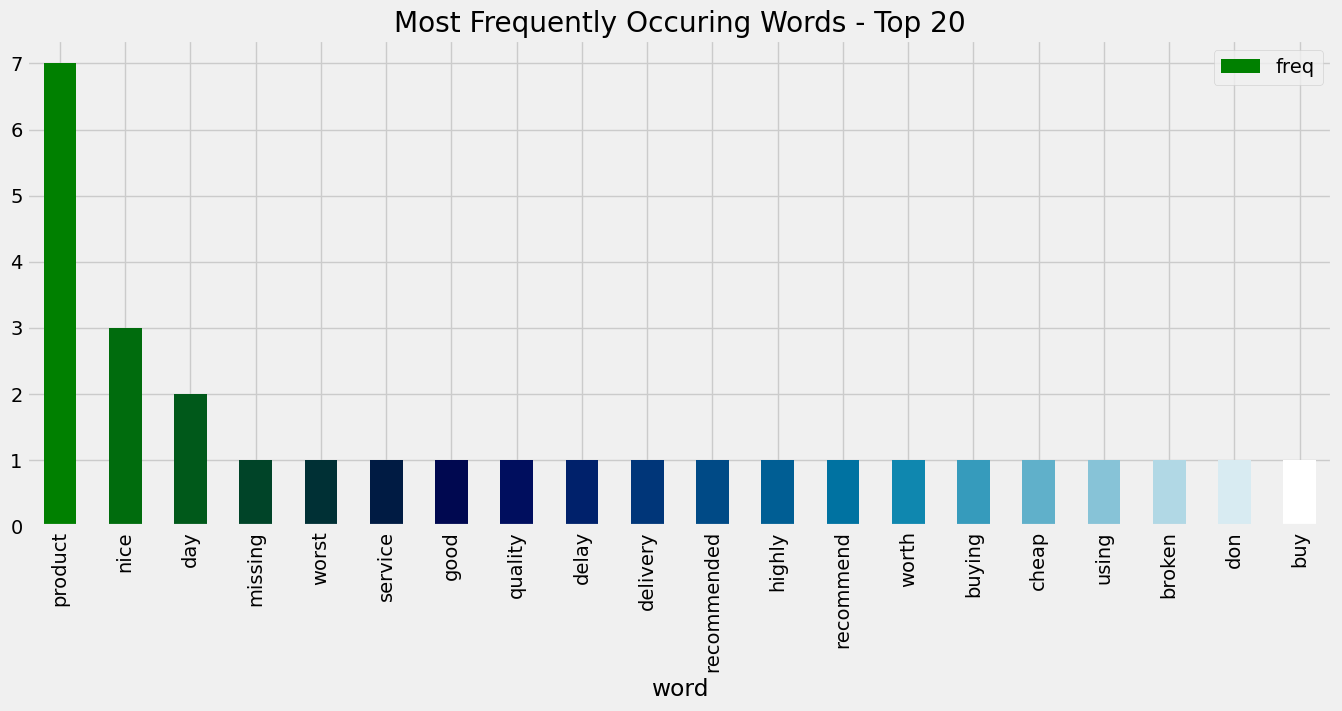

In [28]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.cleaned_data)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [29]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    print(pol)
    if(pol==0):
        return "Neutral"
    elif(pol>0.1 and pol<=1):
        return "Positive"
    elif(pol>-1 and pol<=-0.1):
        return "Negative"
    
data['polarity'] = data['cleaned_data'].apply(get_polarity)


-0.6
0.7
0.0
0.16
-0.15
0.5
0.78
0.78
-0.4
0.6000000000000001


<Axes: ylabel='polarity'>

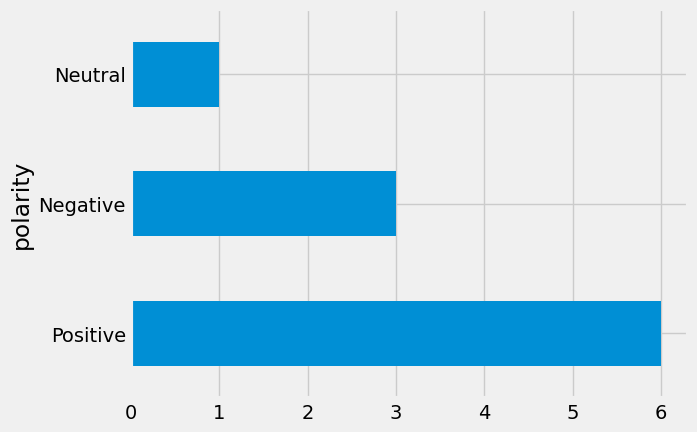

In [30]:
data['polarity'].value_counts().plot(kind='barh')

In [31]:
data['polarity'].value_counts()

polarity
Positive    6
Negative    3
Neutral     1
Name: count, dtype: int64

# Classification

In [32]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

data = pd.read_csv('./test_data_class.tsv', delimiter = '\t')

data

,ID,Review,Label
0,1,The product is missing. It is the worst service.,neg
1,2,It is a good quality product.,pos
2,3,There is a delay of product delivery. Not reco...,neg
3,4,Highly recommend the product. It & nice!,pos
4,5,Not worth buying it!!,neg
5,6,Nice and cheap!,pos
6,7,@It is very nice.,pos
7,8,I have been using this from 10 days and the pr...,pos
8,9,The product is broken after 1 day. Don't buy it!,neg
9,10,Amazing product!,pos


In [33]:
data.isnull().sum()

ID        0
Review    1
Label     2
dtype: int64

In [34]:
data.head()

,ID,Review,Label
0,1,The product is missing. It is the worst service.,neg
1,2,It is a good quality product.,pos
2,3,There is a delay of product delivery. Not reco...,neg
3,4,Highly recommend the product. It & nice!,pos
4,5,Not worth buying it!!,neg


In [35]:
data.dropna(inplace=True)

data

,ID,Review,Label
0,1,The product is missing. It is the worst service.,neg
1,2,It is a good quality product.,pos
2,3,There is a delay of product delivery. Not reco...,neg
3,4,Highly recommend the product. It & nice!,pos
4,5,Not worth buying it!!,neg
5,6,Nice and cheap!,pos
6,7,@It is very nice.,pos
7,8,I have been using this from 10 days and the pr...,pos
8,9,The product is broken after 1 day. Don't buy it!,neg
9,10,Amazing product!,pos


In [36]:
r=0
blanks = []  # start with an empty list

for i in data['Review']:
    if i.isspace():
        blanks.append(r)

    r=r+1
        
blanks

[]

In [37]:
data

,ID,Review,Label
0,1,The product is missing. It is the worst service.,neg
1,2,It is a good quality product.,pos
2,3,There is a delay of product delivery. Not reco...,neg
3,4,Highly recommend the product. It & nice!,pos
4,5,Not worth buying it!!,neg
5,6,Nice and cheap!,pos
6,7,@It is very nice.,pos
7,8,I have been using this from 10 days and the pr...,pos
8,9,The product is broken after 1 day. Don't buy it!,neg
9,10,Amazing product!,pos


In [38]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

data['cleaned_data'] = data['Review'].apply(clean_data)

def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['cleaned_data'] = data['cleaned_data'].apply(drop_numbers)

In [39]:
# changing all the words of the reviews column to lowercase letters
# From library word_tokenize
import nltk
nltk.download('punkt')

def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

data['cleaned_data'] = data['cleaned_data'].apply(lower_case)

import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

data['cleaned_data'] = data['cleaned_data'].apply(lemmatise)

data

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,ID,Review,Label,cleaned_data
0,1,The product is missing. It is the worst service.,neg,the product is missing it is the worst service
1,2,It is a good quality product.,pos,it is a good quality product
2,3,There is a delay of product delivery. Not reco...,neg,there is a delay of product delivery not recom...
3,4,Highly recommend the product. It & nice!,pos,highly recommend the product it nice
4,5,Not worth buying it!!,neg,not worth buying it
5,6,Nice and cheap!,pos,nice and cheap
6,7,@It is very nice.,pos,is very nice
7,8,I have been using this from 10 days and the pr...,pos,i have been using this from day and the produc...
8,9,The product is broken after 1 day. Don't buy it!,neg,the product is broken after day don t buy it
9,10,Amazing product!,pos,amazing product


In [40]:
data

,ID,Review,Label,cleaned_data
0,1,The product is missing. It is the worst service.,neg,the product is missing it is the worst service
1,2,It is a good quality product.,pos,it is a good quality product
2,3,There is a delay of product delivery. Not reco...,neg,there is a delay of product delivery not recom...
3,4,Highly recommend the product. It & nice!,pos,highly recommend the product it nice
4,5,Not worth buying it!!,neg,not worth buying it
5,6,Nice and cheap!,pos,nice and cheap
6,7,@It is very nice.,pos,is very nice
7,8,I have been using this from 10 days and the pr...,pos,i have been using this from day and the produc...
8,9,The product is broken after 1 day. Don't buy it!,neg,the product is broken after day don t buy it
9,10,Amazing product!,pos,amazing product


<Axes: ylabel='Label'>

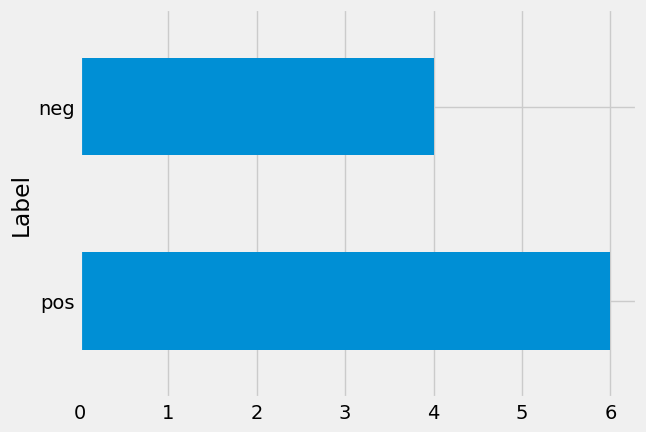

In [41]:
data['Label'].value_counts().plot(kind='barh')

In [42]:
# Classification begins here

from sklearn.model_selection import train_test_split

X = data['Review']
y = data['Label']

# change your train and test size to check accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Creating classifier With data of vectors TFIDF
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Try Randomforestclassifier 

In [44]:
# Training 
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [45]:
# Testing
predictions = text_clf_lsvc.predict(X_test)

In [46]:
from sklearn import metrics

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.5
